# Laboratorio 2

## 1. Carga de datos
##### Se importan todas las librerias necesarias para poder crear, entrenar y crear el modelo

In [1]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [2]:
df = pd.read_csv('./data/MotorAlpes_data.csv', index_col=False)
df = df.iloc[:, 1:]

## 2. Descripción de los datos
##### Se hace una descripcion de los datos para poder entender con que tipo de datos estamos trabajando y elementos que importantes que toque tener en cuenta 

In [3]:
df.shape

(7115, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7115 entries, 0 to 7114
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6876 non-null   float64
 1   km_driven      6917 non-null   float64
 2   owner          6876 non-null   object 
 3   seller_type    7115 non-null   object 
 4   seats          7115 non-null   float64
 5   fuel           7115 non-null   object 
 6   transmission   7115 non-null   object 
 7   mileage        6917 non-null   float64
 8   engine         6835 non-null   float64
 9   max_power      6847 non-null   float64
 10  selling_price  6714 non-null   float64
dtypes: float64(7), object(4)
memory usage: 611.6+ KB


In [5]:
df.describe()

,year,km_driven,seats,mileage,engine,max_power,selling_price
count,6876.000000,6.917000e+03,7115.000000,6917.000000,6835.000000,6847.000000,6714.000000
mean,2013.980948,6.911118e+04,5.411103,19.523473,1835.489539,141.981595,11261.208041
std,3.852565,5.796521e+04,0.953555,4.241574,2363.919253,274.956684,40765.694516
min,1994.000000,1.000000e+00,2.000000,0.000000,4.000000,1.070000,1.910000
25%,2012.000000,3.400000e+04,5.000000,16.800000,1197.000000,68.050000,3210.560000
50%,2015.000000,6.000000e+04,5.000000,19.330000,1248.000000,83.100000,5451.900000
75%,2017.000000,9.400000e+04,5.000000,22.320000,1597.000000,104.680000,8480.740000
max,2020.000000,2.360457e+06,14.000000,46.816000,19972.000000,1995.640000,598983.440000


### 2.1 Completitud
##### Revision de datos faltantes y el porcentaje que representan

In [6]:
df.isnull().sum()    

year             239
km_driven        198
owner            239
seller_type        0
seats              0
fuel               0
transmission       0
mileage          198
engine           280
max_power        268
selling_price    401
dtype: int64

In [7]:
# Show null values as a percentage of the dataframe
df.isnull().sum() / df.shape[0]

year             0.033591
km_driven        0.027829
owner            0.033591
seller_type      0.000000
seats            0.000000
fuel             0.000000
transmission     0.000000
mileage          0.027829
engine           0.039353
max_power        0.037667
selling_price    0.056360
dtype: float64

### 2.2 Consistencia
##### Revision de que todos los datos que se encuentran dentro del dataframe cuamplan con las normas establecidas en el diccionario de datos

In [8]:
# check if year is between 1994 and 2020

print(all(map(lambda x: x in range(1994,2021), df["year"])))

False


In [9]:
# check if km_driven is between 1 and 2’360.457

print(all(map(lambda x: x in range(1,2360458), df["km_driven"])))

False


In [10]:
# check if owner is in ['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car']

print(all(map(lambda x: x in ['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car'], df["owner"])))

False


In [11]:
# check if seller_type is in ['Individual', 'Dealer', 'Trustmark Dealer']

print(all(map(lambda x: x in ['Individual', 'Dealer', 'Trustmark Dealer'], df["seller_type"])))

True


In [12]:
# check if seats is between 2 and 14

print(all(map(lambda x: x in range(2,15), df["seats"])))

True


In [13]:
# check if fuel is in ['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric']

print(all(map(lambda x: x in ['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], df["fuel"])))

True


In [14]:
# check if transmission is in ['Manual', 'Automatic']

print(all(map(lambda x: x in ['Manual', 'Automatic'], df["transmission"])))

True


In [15]:
# check if mileage is between 0 and 46.816

print(all(map(lambda x: 34.2 <= x <= 46.816, df["mileage"])))

False


In [16]:
# check if engine is between 624 and 3604

print(all(map(lambda x: x in range(624,3605), df["engine"])))

False


In [17]:
# check if max_power is between 34.2 and 400

print(all(map(lambda x: 32.8 <= x <= 400, df["max_power"])))

False


In [18]:
# check if selling_price is between 363.45 and 121153.38

print(all(map(lambda x: 363.45 <= x <= 121153.38, df["selling_price"])))

False


### 2.3 Consistencia
##### Revisar que todos los datos sean consistentes semanticamente, es decir, los atributos sean unicos y no tengan otros nombres

In [19]:
# for every categorical variable, check if there are values that are not in the list of possible values

categorical = ['owner', 'seller_type', 'fuel', 'transmission']

for col in categorical:
    print(col, df[col].unique())

owner [nan 'Second Owner' 'Third Owner' 'First Owner' 'Fourth & Above Owner'
 'Test Drive Car']
seller_type ['Individual' 'Dealer' 'Trustmark Dealer']
fuel ['Diesel' 'Petrol' 'LPG' 'CNG']
transmission ['Manual' 'Automatic']


## 3. Análisis Exploratorio

### 3.1 Preparación de los datos
##### Se deben preparar los datos para poderlos procesar. Esto incluye agregar nuevas columnas relevantes, llenar valores vacios con alguna metrica determinada y reemplazar los valores categoricos por representaciones numericas

In [20]:
# Set a column that specifies the age gap
df['antiquity'] = 2020 - df['year']

In [21]:
# Fill numerical values with the median so as not to skew the data
df = df.fillna(df.median())

/var/folders/7y/s678cmw965v15n9dxxzzvrjh0000gn/T/ipykernel_34832/1869067488.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())


In [22]:
# Fill categorical values with the mode
categorical_cols = ['owner', 'seller_type', 'fuel', 'transmission']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [23]:
# Replace all the categorical values with numbers
df['owner'] = df['owner'].replace({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5})
df['seller_type'] = df['seller_type'].replace({'Individual': 1, 'Dealer': 2, 'Trustmark Dealer': 3})
df['fuel'] = df['fuel'].replace({'Petrol': 1, 'Diesel': 2, 'CNG': 3, 'LPG': 4, 'Electric': 5})
df['transmission'] = df['transmission'].replace({'Manual': 1, 'Automatic': 2})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7115 entries, 0 to 7114
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7115 non-null   float64
 1   km_driven      7115 non-null   float64
 2   owner          7115 non-null   int64  
 3   seller_type    7115 non-null   int64  
 4   seats          7115 non-null   float64
 5   fuel           7115 non-null   int64  
 6   transmission   7115 non-null   int64  
 7   mileage        7115 non-null   float64
 8   engine         7115 non-null   float64
 9   max_power      7115 non-null   float64
 10  selling_price  7115 non-null   float64
 11  antiquity      7115 non-null   float64
dtypes: float64(8), int64(4)
memory usage: 667.2 KB


In [24]:
# Asumimos que el experto decidio que estos eran los features mas relevantes
features = ["antiquity", "km_driven", "seats", "fuel", "transmission", "max_power", "selling_price"]
#TODO: justificar atributos

In [25]:
# Make a scaler to normalize de data
scaler = StandardScaler()
x = scaler.fit_transform(df[features])

In [26]:
# Make a dataframe with the normalized data
df = pd.DataFrame(x, columns=features)

### 3.2 Visualización de los datos
##### Se visualizan los datos incialmente comparados contra el "selling_price" para ver tendencias y ayudar en la identificacion de features

In [27]:
#sns.pairplot(df)
#plt.show()

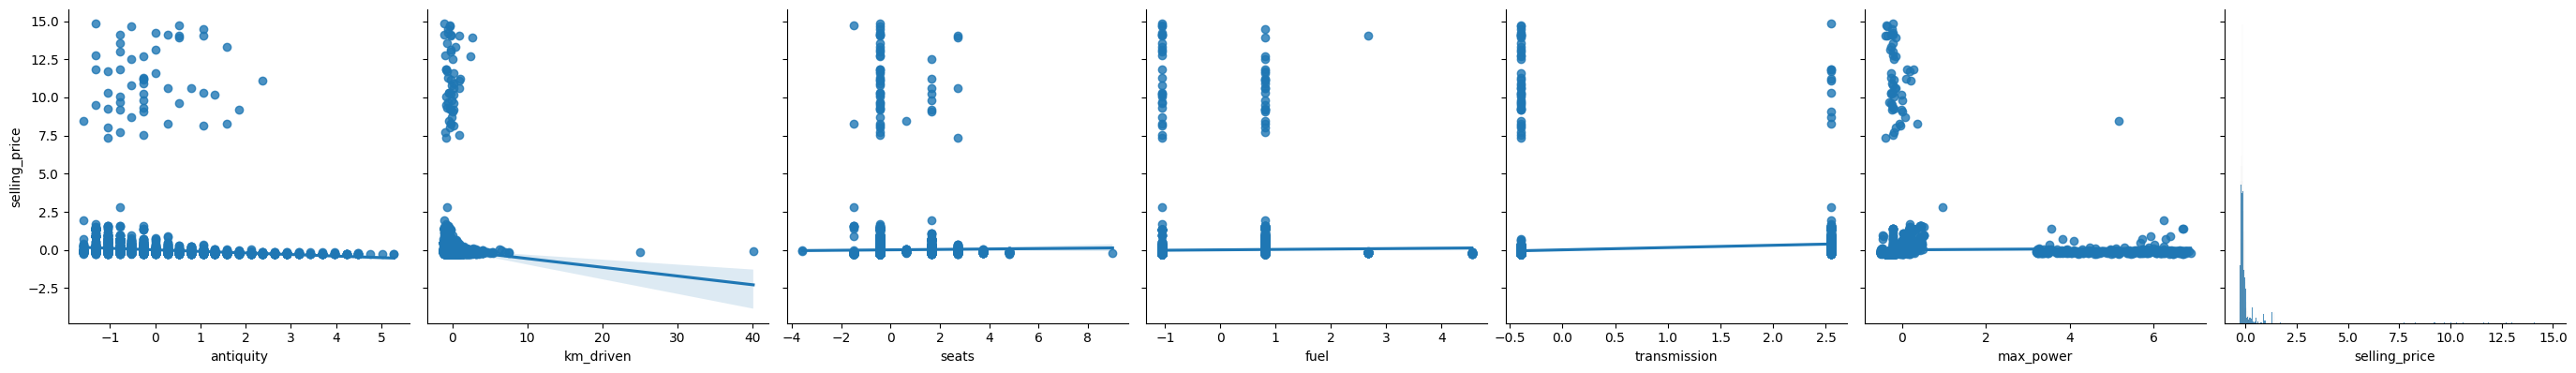

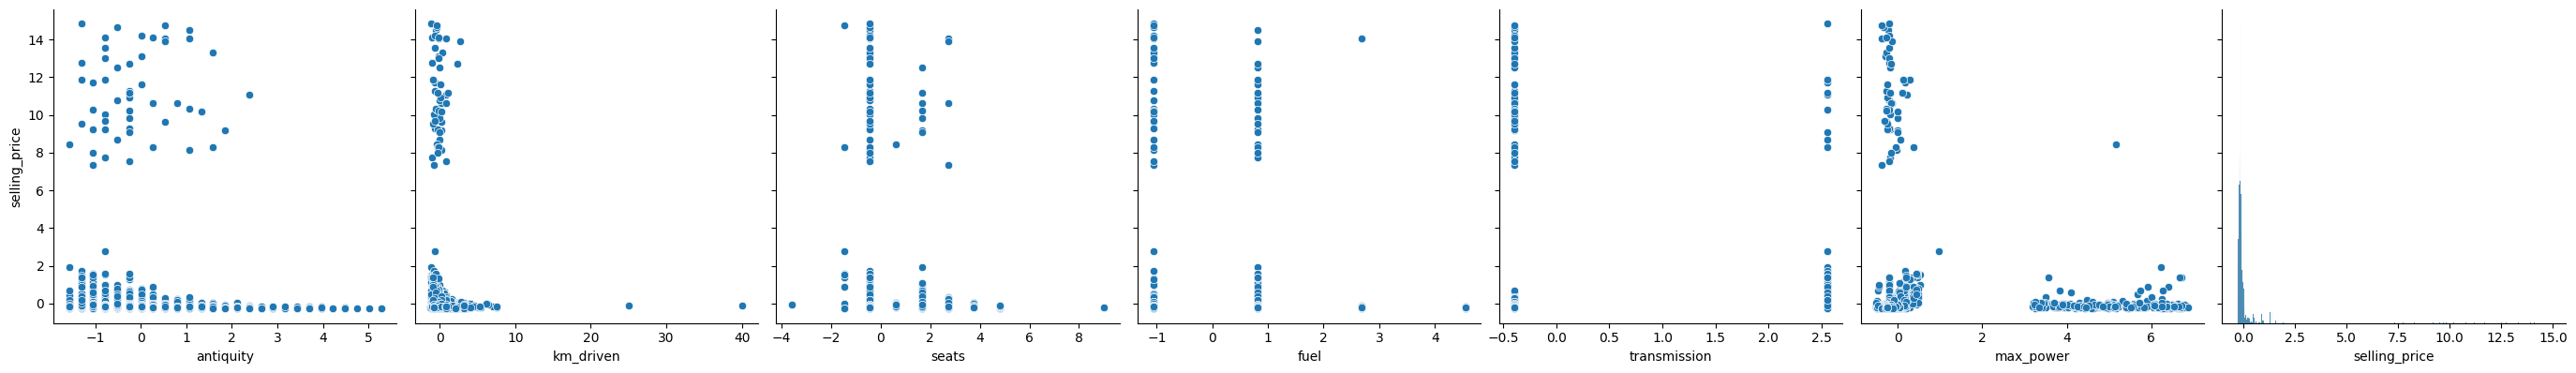

In [28]:
sns.pairplot(df, x_vars=list(df.columns), y_vars='selling_price', height=4, aspect=1, kind='reg')
sns.pairplot(df, x_vars=list(df.columns), y_vars='selling_price', height=4, aspect=1)

In [29]:
df[df.columns].corr()

,antiquity,km_driven,seats,fuel,transmission,max_power,selling_price
antiquity,1.000000,0.412650,0.013623,-0.018283,-0.239609,-0.053672,-0.102322
km_driven,0.412650,1.000000,0.224160,0.253972,-0.192115,-0.007598,-0.057280
seats,0.013623,0.224160,1.000000,0.305467,-0.073186,0.022073,0.013726
fuel,-0.018283,0.253972,0.305467,1.000000,-0.041470,0.037757,0.026568
transmission,-0.239609,-0.192115,-0.073186,-0.041470,1.000000,0.072900,0.149686
max_power,-0.053672,-0.007598,0.022073,0.037757,0.072900,1.000000,0.015804
selling_price,-0.102322,-0.057280,0.013726,0.026568,0.149686,0.015804,1.000000


In [30]:
# Correlation between features chosen
df[features].corr()

,antiquity,km_driven,seats,fuel,transmission,max_power,selling_price
antiquity,1.000000,0.412650,0.013623,-0.018283,-0.239609,-0.053672,-0.102322
km_driven,0.412650,1.000000,0.224160,0.253972,-0.192115,-0.007598,-0.057280
seats,0.013623,0.224160,1.000000,0.305467,-0.073186,0.022073,0.013726
fuel,-0.018283,0.253972,0.305467,1.000000,-0.041470,0.037757,0.026568
transmission,-0.239609,-0.192115,-0.073186,-0.041470,1.000000,0.072900,0.149686
max_power,-0.053672,-0.007598,0.022073,0.037757,0.072900,1.000000,0.015804
selling_price,-0.102322,-0.057280,0.013726,0.026568,0.149686,0.015804,1.000000


## 4. Modelamiento
##### Se procede a relalizar el modelo de acuerdo al analisis exploratorio y atributos escogidos como mas relevantes para entrenar el modelo

In [31]:
x_train, x_test, y_train, y_test = train_test_split(df[features], df['selling_price'], test_size = 0.3, random_state = 1)

In [32]:
x_train

,antiquity,km_driven,seats,fuel,transmission,max_power,selling_price
1839,1.850249,0.894590,1.666405,0.809492,-0.392073,-0.284371,-0.138362
1019,0.267753,1.856659,-0.431157,0.809492,-0.392073,-0.262144,-0.214809
6009,-0.787244,-1.117007,-0.431157,-1.060487,-0.392073,-0.320305,-0.188817
1891,0.531502,-0.364845,-0.431157,-1.060487,-0.392073,-0.269183,-0.198908
3477,0.531502,1.052020,1.666405,0.809492,-0.392073,0.000875,-0.094022
...,...,...,...,...,...,...,...
905,0.267753,0.019982,-0.431157,-1.060487,-0.392073,-0.265664,-0.181172
5192,-0.523495,-0.644719,-0.431157,0.809492,-0.392073,-0.189907,-0.064973
3980,-1.314743,-0.504782,-0.431157,0.809492,-0.392073,-0.155084,0.090980
235,0.531502,2.171517,-0.431157,0.809492,-0.392073,-0.243992,-0.178114


In [33]:
x_test

,antiquity,km_driven,seats,fuel,transmission,max_power,selling_price
5930,0.531502,1.349386,-0.431157,0.809492,-0.392073,-0.049802,-0.133775
2441,-0.523495,-0.644719,-0.431157,-1.060487,-0.392073,-0.214727,-0.123072
5028,0.004004,-0.329861,1.666405,0.809492,-0.392073,0.000875,-0.046625
1564,-1.050994,-1.117007,-0.431157,-1.060487,-0.392073,-0.214727,-0.107783
5213,-0.523495,0.894590,1.666405,0.809492,-0.392073,-0.189907,-0.034394
...,...,...,...,...,...,...,...
5477,0.531502,0.492271,-0.431157,4.549451,-0.392073,-0.265478,-0.138362
643,0.004004,-0.154939,-0.431157,0.809492,-0.392073,-0.188795,-0.168941
6643,0.795251,0.492271,-0.431157,0.809492,-0.392073,-0.243622,-0.161296
2188,-1.314743,-1.029547,-0.431157,-1.060487,-0.392073,-0.269368,-0.153957


In [34]:
y_train

1839   -0.138362
1019   -0.214809
6009   -0.188817
1891   -0.198908
3477   -0.094022
          ...   
905    -0.181172
5192   -0.064973
3980    0.090980
235    -0.178114
5157    0.045111
Name: selling_price, Length: 4980, dtype: float64

In [35]:
y_test

5930   -0.133775
2441   -0.123072
5028   -0.046625
1564   -0.107783
5213   -0.034394
          ...   
5477   -0.138362
643    -0.168941
6643   -0.161296
2188   -0.153957
4966   -0.260677
Name: selling_price, Length: 2135, dtype: float64

In [36]:
x_train.shape, y_train.shape

((4980, 7), (4980,))

In [37]:
x_test.shape, y_test.shape

((2135, 7), (2135,))

### 4.1. Regresion
##### Se procede a realizar una regresion linear para tratar de predecir el "selling_price" de acuerdo con los atributos escogidos

In [38]:
regression = LinearRegression()

In [39]:
regression.fit(x_train, y_train)

LinearRegression()

In [40]:
regression.intercept_

-6.600080725005508e-18

In [41]:
pd.DataFrame({'columns': features, 'coef': regression.coef_})

,columns,coef
0,antiquity,-2.223957e-16
1,km_driven,-3.053113e-16
2,seats,1.408480e-16
3,fuel,5.055008e-16
4,transmission,3.950583e-16
5,max_power,4.205717e-16
6,selling_price,1.000000e+00


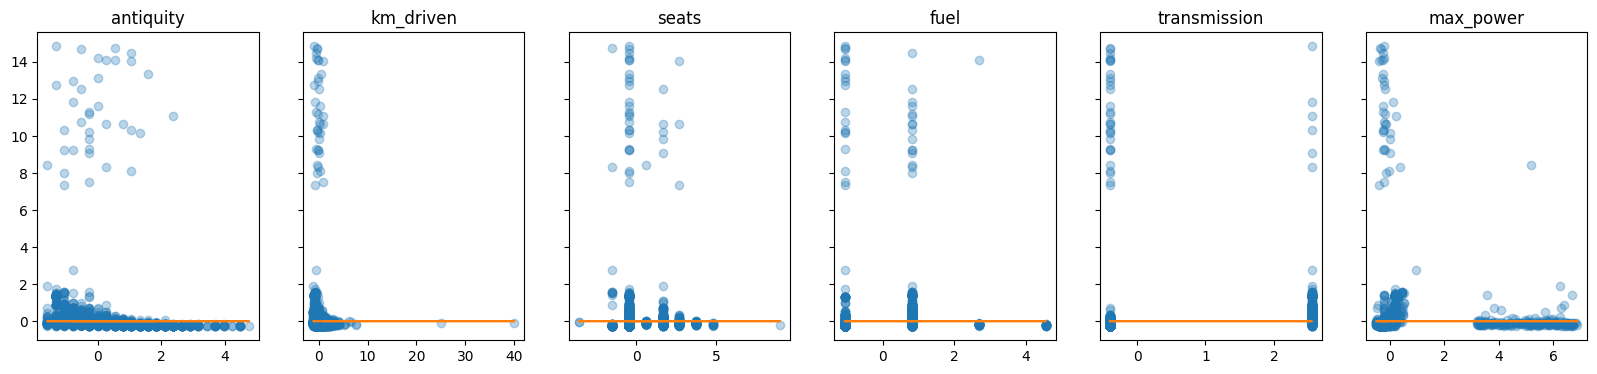

In [54]:
# Plot of the regression overlapped with the data in order to see if the regression has some relation with the data
f, axs = plt.subplots(1, len(features[:-1]), sharey = True, figsize = (20, 4))

for i in range(len(features[:-1])):
    col = features[i]
    x = x_train[col]
    m = regression.coef_[i]
    b = regression.intercept_
    axs[i].plot(x, y_train, 'o', alpha = 0.3)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

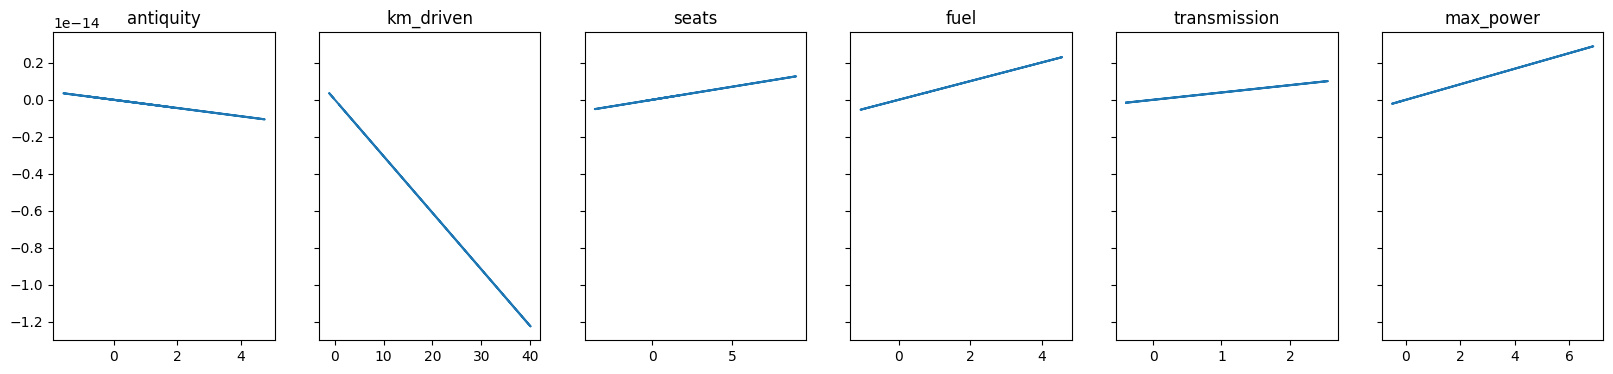

In [55]:
# Plot only the regression to see clearly how each attribute affects the regression line on a scale that is visibly understandable
f, axs = plt.subplots(1, len(features[:-1]), sharey = True, figsize = (20, 4))

for i in range(len(features[:-1])):
    col = features[i]
    x = x_train[col]
    m = regression.coef_[i]
    b = regression.intercept_
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

In [44]:
# Comparing the real values with the predicted values with an difference percentage for each prediction

y_pred = regression.predict(x_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df['Difference'] = df['Actual'] - df['Predicted']
df['Difference %'] = df['Difference'] / df['Actual'] * 100
df


,Actual,Predicted,Difference,Difference %
5930,-0.133775,-0.133775,-8.326673e-17,6.224380e-14
2441,-0.123072,-0.123072,1.249001e-16,-1.014850e-13
5028,-0.046625,-0.046625,-7.355228e-16,1.577515e-12
1564,-0.107783,-0.107783,-9.714451e-17,9.012977e-14
5213,-0.034394,-0.034394,-3.608225e-16,1.049095e-12
...,...,...,...,...
5477,-0.138362,-0.138362,-2.164935e-15,1.564689e-12
643,-0.168941,-0.168941,-7.216450e-16,4.271587e-13
6643,-0.161296,-0.161296,-3.053113e-16,1.892862e-13
2188,-0.153957,-0.153957,-2.498002e-16,1.622531e-13


### 5. Validación del modelo
##### Se debe revisar que el error del modelo entrenado este cercano al error de los datos de prueba. Esto se hace para verificar que el modelo no tenga overfitting o underfitting ya que esto podria evitar que el modelo prediciera adecuadamente el "selling_price" de datos que nunca haya visto.

In [45]:
print('Mean Absolute Error Train:', mean_absolute_error(y_train, regression.predict(x_train)))
print('Mean Absolute Error Test:', mean_absolute_error(y_test, regression.predict(x_test)))

print('Root Mean Squared Error Train:', np.sqrt(mean_squared_error(y_train, regression.predict(x_train))))
print('Root Mean Squared Error Test:', np.sqrt(mean_squared_error(y_test, regression.predict(x_test))))

Mean Absolute Error Train: 8.820587951125393e-16
Mean Absolute Error Test: 8.681085933209911e-16
Root Mean Squared Error Train: 3.371010706521771e-15
Root Mean Squared Error Test: 3.263408517096625e-15


Podemos apreciar que nuestro error en las pruebas se acerca bastante al error del entrenamiento, y ademas es un error relativamente bajo, lo cual nos da un buen indicio de que nuestro modelo predice adecuadamente el "selling_price" de un carro 

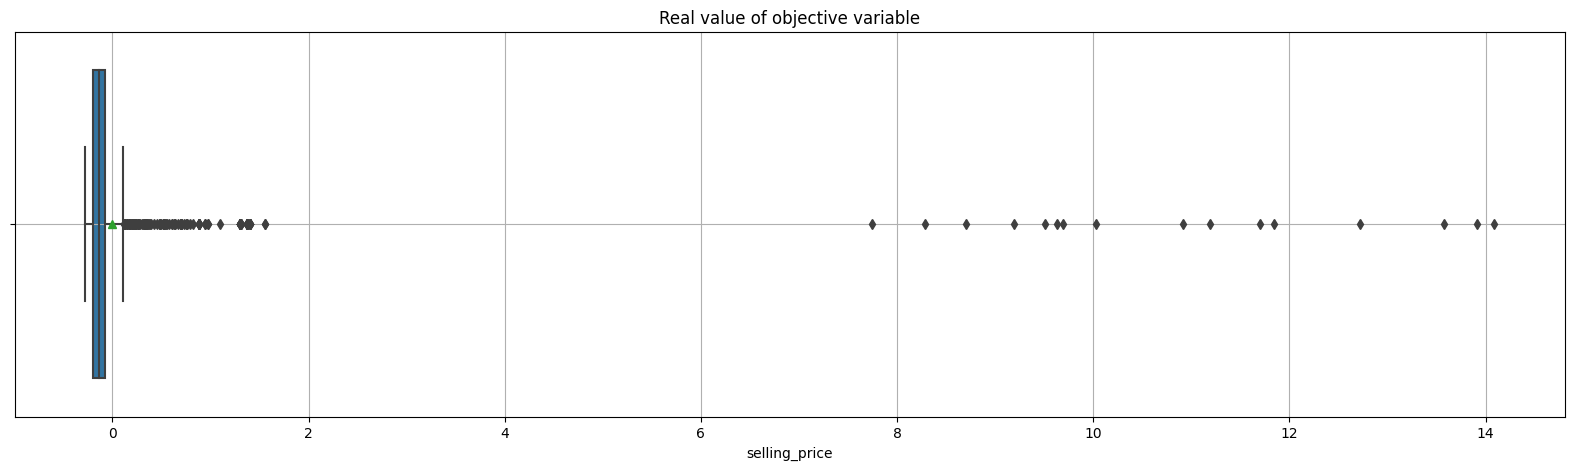

In [46]:
# Plot real value of objective variable on a boxplot

plt.figure(figsize=(20, 5))
sns.boxplot(x = y_test, showmeans = True)
plt.title('Real value of objective variable')
plt.grid()
plt.show()   

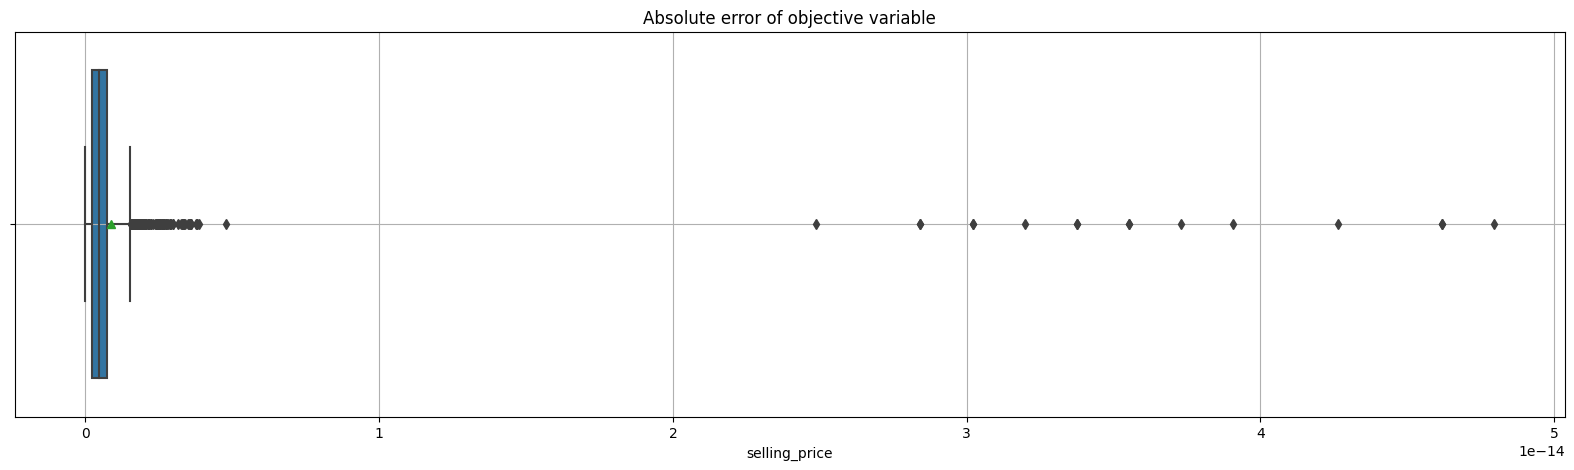

In [47]:
# Plot |real value - predicted value| of objective variable on a boxplot

plt.figure(figsize=(20, 5))
sns.boxplot(x = abs(y_test - regression.predict(x_test)), showmeans=True)
plt.title('Absolute error of objective variable')
plt.grid()
plt.show()

In [48]:
abs(y_test - regression.predict(x_test)).describe(percentiles = [0.25, 0.5, 0.75, 0.95, 0.99])

count    2.135000e+03
mean     8.681086e-16
std      3.146563e-15
min      0.000000e+00
25%      2.220446e-16
50%      4.718448e-16
75%      7.494005e-16
95%      2.006728e-15
99%      3.598788e-15
max      4.796163e-14
Name: selling_price, dtype: float64

Creo que esto quiere decir que nuestros resultados son muy acercados. No se si esto puede ser un problema como de overfitting?

## 8. Exportación del modelo
##### Se debe exportar el modelo hecho anteriormente para poder enviarlo a MotorAlpes para que lo puedan correr

In [49]:
# No sé si hay que incluir lo de preparación de los datos, creo que no

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regression', LinearRegression())
])

pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regression', LinearRegression())])

##### Se debe revisar que el pipeline este funcionando bien

In [50]:
y_pred = pipeline.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df['Difference'] = df['Actual'] - df['Predicted']
df['Difference %'] = df['Difference'] / df['Actual'] * 100
df

,Actual,Predicted,Difference,Difference %
5930,-0.133775,-0.133775,-4.163336e-16,3.112190e-13
2441,-0.123072,-0.123072,-2.775558e-16,2.255223e-13
5028,-0.046625,-0.046625,4.857226e-17,-1.041756e-13
1564,-0.107783,-0.107783,-2.914335e-16,2.703893e-13
5213,-0.034394,-0.034394,-1.179612e-16,3.429735e-13
...,...,...,...,...
5477,-0.138362,-0.138362,-4.440892e-16,3.209619e-13
643,-0.168941,-0.168941,-4.163336e-16,2.464377e-13
6643,-0.161296,-0.161296,-3.053113e-16,1.892862e-13
2188,-0.153957,-0.153957,-4.440892e-16,2.884499e-13


In [51]:
print('Mean Absolute Error Train:', mean_absolute_error(y_train, pipeline.predict(x_train)))
print('Mean Absolute Error Test:', mean_absolute_error(y_test, pipeline.predict(x_test)))

Mean Absolute Error Train: 6.732478791745799e-16
Mean Absolute Error Test: 6.626065775621432e-16


In [52]:
print('Root Mean Squared Error Train:', np.sqrt(mean_squared_error(y_train, pipeline.predict(x_train))))
print('Root Mean Squared Error Test:', np.sqrt(mean_squared_error(y_test, pipeline.predict(x_test))))

Root Mean Squared Error Train: 2.8677556971995803e-15
Root Mean Squared Error Test: 2.7772362120041067e-15


In [53]:
abs(y_test - regression.predict(x_test)).describe(percentiles = [0.25, 0.5, 0.75, 0.95, 0.99])

count    2.135000e+03
mean     8.681086e-16
std      3.146563e-15
min      0.000000e+00
25%      2.220446e-16
50%      4.718448e-16
75%      7.494005e-16
95%      2.006728e-15
99%      3.598788e-15
max      4.796163e-14
Name: selling_price, dtype: float64